## FAKE NEWS DETECTION 

### What is Fake News ?

False news, also known as unwanted news, false stories, misconceptions or fraudulent stories, types of stories that contain deliberate information or frauds that are spread through traditional media (print and broadcast) or online media. Digital news has revived and increased the use of fake news, or yellow journalism. These stories are often referred to as information that is not in the media but sometimes finds its way into the mainstream media as well.

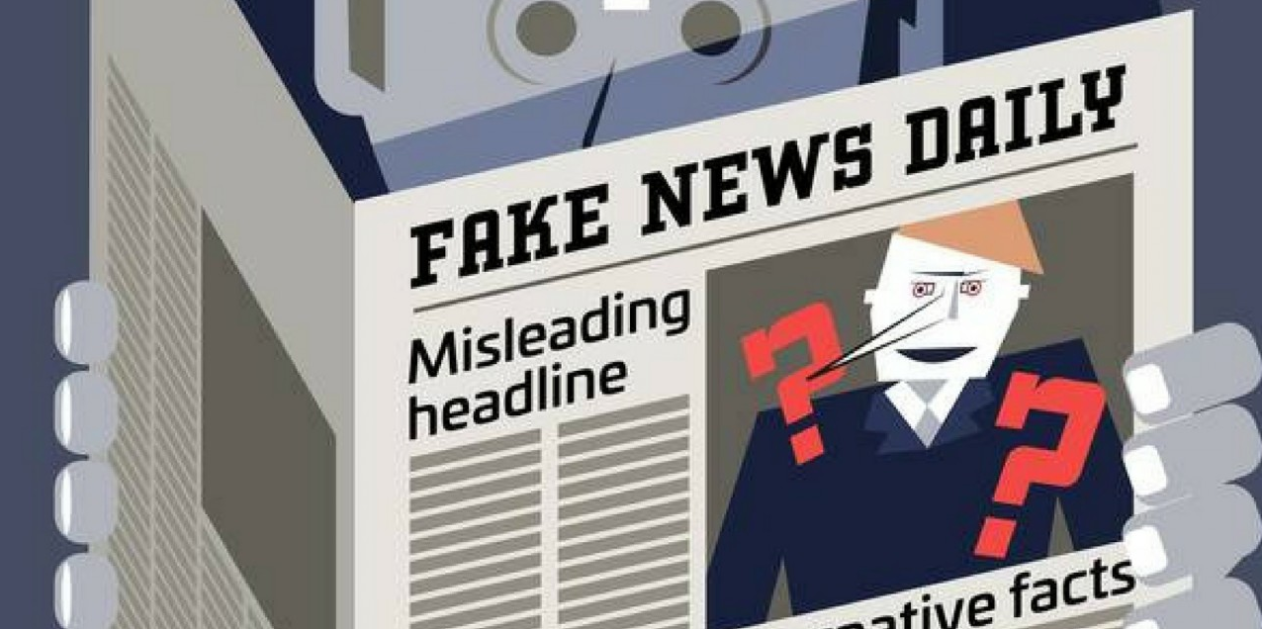

### Problem description:
At Bytedance, we have created a large-scale database to store existing fake news articles. Any new article must go through a test on the truthfulness of content before being published. We conduct matching between the new article and the articles in the database. Articles identified as containing fake news will be withdrawn after human verification. The accuracy and efficiency of the process, therefore, becomes crucial for us to make the platform safe, reliable, and healthy.

## Importing the libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#os.chdir(R'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\Fake News Detection Casestudy')
#os.getcwd()

## Importing the dataset

#### Lets look at the Real News

In [5]:
real_news = pd.read_excel('Real_News.xlsx')

In [6]:
real_news.head()

,Title,News_text,Subject
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews


In [7]:
real_news.shape

(21755, 3)

#### Now, lets look at the Fake News

In [8]:
fake_news = pd.read_excel('Fake_News.xlsx')

In [9]:
fake_news.head()

,Title,News_text,Subject
0,Harry Reid UNLEASHES Anti-Trump Rant On Senat...,Senate Minority Leader Harry Reid has it out f...,News
1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...,In their desire to push Hillary Clinton across...,left-news
2,Trumpâ€™s Latest Appointee Is A Climate Denie...,There are people currently being turned down f...,News
3,[VIDEO] TWO STREET PREACHERS SEVERELY BEATEN B...,Gay pride? Tolerance is a one-way street for t...,politics
4,Dem. Rep. Says Steve Bannon Is A â€˜Stone Col...,"Congressman Hakeem Jeffries says that, while h...",News


In [10]:
fake_news.shape

(23697, 3)

#### Creating Target based on Real and Fake data

In [11]:
real_news['Target'] = 1
fake_news['Target'] = 0

In [12]:
real_news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1


In [13]:
fake_news.head()

,Title,News_text,Subject,Target
0,Harry Reid UNLEASHES Anti-Trump Rant On Senat...,Senate Minority Leader Harry Reid has it out f...,News,0
1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...,In their desire to push Hillary Clinton across...,left-news,0
2,Trumpâ€™s Latest Appointee Is A Climate Denie...,There are people currently being turned down f...,News,0
3,[VIDEO] TWO STREET PREACHERS SEVERELY BEATEN B...,Gay pride? Tolerance is a one-way street for t...,politics,0
4,Dem. Rep. Says Steve Bannon Is A â€˜Stone Col...,"Congressman Hakeem Jeffries says that, while h...",News,0


#### Now we will merge these two dataframes using pd.concat function

In [14]:
news = pd.concat([real_news, fake_news]).reset_index(drop=True)

In [15]:
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,WASHINGTON (Reuters) - A lawyer nominated by P...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(Reuters) - U.S. Senator Dick Durbin, the No. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",GENEVA (Reuters) - The head of the World Trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,BUDAPEST (Reuters) - Hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,1


## Data Pre-processing

These are some of the methods of processing the data in NLP:
* Tokenization
* Stop words removal
* Stemming and Lemmatization
* Convert to Lowercase
* Removal of Punctuation
* Parts of speech tagging

### Missing value Treatment

In [16]:
news.isnull().sum()

Title        0
News_text    0
Subject      0
Target       0
dtype: int64

There is no missing value in the dataset

##  Converting the text to lowercase

In [17]:
news['News_text'] = news['News_text'].apply(lambda x: x.lower())
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,washington (reuters) - a lawyer nominated by p...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,"(reuters) - u.s. senator dick durbin, the no. ...",politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",geneva (reuters) - the head of the world trade...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,budapest (reuters) - hungary is facing a front...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,washington (reuters) - u.s. senate republicans...,politicsNews,1


## Removing the punctuation from the text

In [18]:
import string

In [19]:
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

news['News_text'] = news['News_text'].apply(punctuation_removal)

In [20]:
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,washington reuters a lawyer nominated by pres...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,reuters us senator dick durbin the no 2 democ...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",geneva reuters the head of the world trade or...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,budapest reuters hungary is facing a frontal ...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,washington reuters us senate republicans ramm...,politicsNews,1


## Removal of Stopwords

In [21]:
stop = stopwords.words('english')

news['News_text'] = news['News_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [22]:
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,washington reuters lawyer nominated president ...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,reuters us senator dick durbin 2 democrat sena...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",geneva reuters head world trade organization s...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,budapest reuters hungary facing frontal assaul...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,washington reuters us senate republicans ramme...,politicsNews,1


In [23]:
news['News_text'][0]

'washington reuters lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersenâ€™s offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trumpâ€™s judicial nominations fail president seeks win confirmation judges make federal judiciary conservative â€œjust youâ€™ve seen â€˜my cousin vinnyâ€™ doesnâ€™t qualify federal judgeâ€\x9d republican senator john kennedy grilled petersen dec 13 confirmation hearing told wwltv referring 1992 comedy film novice lawyer kennedy critical trumpâ€™s judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet â€œwhile honored nominated position become clear past days nomination become distraction fair administrationâ

## Tokenization of the text 

Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP.

In [24]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
news['News_text']= news['News_text'].apply(lambda x: tokenization(x))

In [25]:
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,[washington reuters lawyer nominated president...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,[reuters us senator dick durbin 2 democrat sen...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",[geneva reuters head world trade organization ...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,[budapest reuters hungary facing frontal assau...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,[washington reuters us senate republicans ramm...,politicsNews,1


##  Lemmatization of the text

It reduces inflectional forms and sometimes derivationally related forms of a word to a common base form. 
Both in stemming and in lemmatization, we try to reduce a given word to its root word. The root word is called a stem in the stemming process, and it is called a lemma in the lemmatization process.

In [26]:
wordnet_lemmatizer = WordNetLemmatizer()

In [27]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
news['News_text']=news['News_text'].apply(lambda x:lemmatizer(x))

In [28]:
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,[washington reuters lawyer nominated president...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,[reuters us senator dick durbin 2 democrat sen...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",[geneva reuters head world trade organization ...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,[budapest reuters hungary facing frontal assau...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,[washington reuters us senate republicans ramm...,politicsNews,1


In [29]:
news['News_text'][0]

['washington reuters lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersenâ€™s offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trumpâ€™s judicial nominations fail president seeks win confirmation judges make federal judiciary conservative â€œjust youâ€™ve seen â€˜my cousin vinnyâ€™ doesnâ€™t qualify federal judgeâ€\x9d republican senator john kennedy grilled petersen dec 13 confirmation hearing told wwltv referring 1992 comedy film novice lawyer kennedy critical trumpâ€™s judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet â€œwhile honored nominated position become clear past days nomination become distraction fair administration

In [30]:
news['News_text']=news['News_text'].apply(str)

In [31]:
news.head()

,Title,News_text,Subject,Target
0,Trump judicial nominee withdraws from consider...,['washington reuters lawyer nominated presiden...,politicsNews,1
1,No. 2 Democrat in Senate calls on Franken to r...,['reuters us senator dick durbin 2 democrat se...,politicsNews,1
2,"WTO chief won't debate Trump, but rallies supp...",['geneva reuters head world trade organization...,politicsNews,1
3,Hungary says it is facing 'frontal assault' fr...,['budapest reuters hungary facing frontal assa...,worldnews,1
4,Senate Republicans shove tax bill ahead as Dem...,['washington reuters us senate republicans ram...,politicsNews,1


In [32]:
news['News_text'][0]

"['washington reuters lawyer nominated president donald trump serve federal judge withdrew consideration monday video senate confirmation hearing showing unable provide answers rudimentary legal questions went viral last week trump accepted matthew petersenâ€™s offer withdraw nomination district court judge washington white house official said petersen republican member federal election commission became latest trumpâ€™s judicial nominations fail president seeks win confirmation judges make federal judiciary conservative â€œjust youâ€™ve seen â€˜my cousin vinnyâ€™ doesnâ€™t qualify federal judgeâ€\\x9d republican senator john kennedy grilled petersen dec 13 confirmation hearing told wwltv referring 1992 comedy film novice lawyer kennedy critical trumpâ€™s judicial nominees asked several basic legal questions petersen could answer video shown cable news shows widely viewed internet â€œwhile honored nominated position become clear past days nomination become distraction fair administrati

### Word Cloud for fake and real news

#### Word cloud for fake news

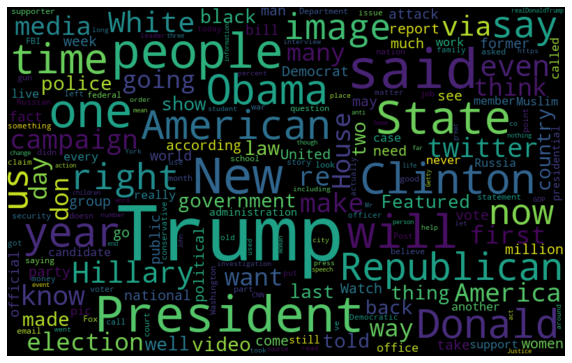

In [33]:
fake_data = news[news["Target"] == 0]
all_words = ' '.join([News_text for News_text in fake_news.News_text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word cloud for real news

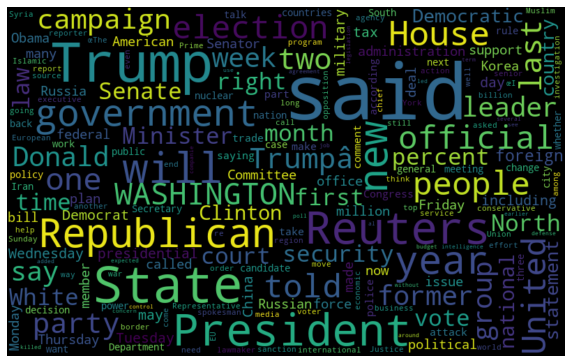

In [34]:
real_data = news[news["Target"] == 1]
all_words = ' '.join([News_text for News_text in real_news.News_text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Creating Independent & dependent variables

In [35]:
# Feature or Independent variables
X= news['News_text']

# Label or Dependent variable
y= news['Target']

## Creating the Bag of Words model

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000) 

In [37]:
X = cv.fit_transform(news['News_text']).toarray()

In [38]:
# It will represent a sparse matix
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 1, 0]])

In [39]:
X.shape

(45452, 2000)

### Spliting the data into train and test

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Naive Bayes

In [41]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier  = MultinomialNB()

In [42]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [43]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [44]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[4547,  249],
       [  94, 4201]])

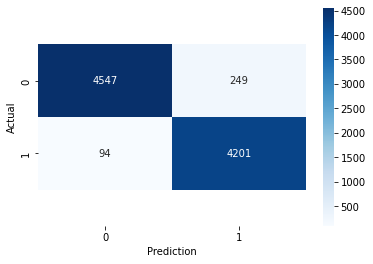

In [47]:
ax = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [48]:
from sklearn.metrics import classification_report, accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print(accuracy)

0.962270377296227


In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4641
           1       0.98      0.94      0.96      4450

    accuracy                           0.96      9091
   macro avg       0.96      0.96      0.96      9091
weighted avg       0.96      0.96      0.96      9091



## Artificial Neural Networks (ANN)

### Building the Artifical Neural Network

We can summarize 7 steps:
1. Randomly initialise the weights to small numbers close to 0, but not 0
2. Input the first observation of your dataset, in the input layer, each feature in one input node
3. Forward-Propagation: from left to right, the neurons are activated in a way the impact of each neuron’s activation is limited by the weights and it runs until getting the y
4. Compare the predicted result to the actual result. Measure the error generated
5. Back-propagation: from right to left. The error is back propagated. Update the weights according to how much they are responsible for the error. The learning rate decides how much we update the weights
6. Repeat steps 1 to 5 and update the weights after each observation (Reinforcement Learning). Repeat steps 1 to 5 but update the weights only after a batch of observation (Batch Learning)
7. When the whole training set passed through the ANN, that makes an epoch. 

nodes of hidden layers, based on experiments, is to choose the average between the input and the output layers. 

In [61]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [62]:
# Initialising the ANN
classifier_ANN = Sequential()

In [63]:
# Adding the input layer and the first hidden layer
classifier_ANN.add(Dense(6, kernel_initializer = 'random_uniform', activation = 'relu'))
#Output_dim = nodes of first hidden layer
#init = initialization of the weights based on an uniform distribution
#activation = activation function
#input_dim = no. of input features

In [64]:
# Adding the second hidden layer
classifier_ANN.add(Dense(6, kernel_initializer = 'random_uniform', activation = 'relu'))

In [65]:
# Adding the output layer
classifier_ANN.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [66]:
# Compiling the ANN
classifier_ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
#Fitting the ANN to the Training set
classifier_ANN.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
3637/3637 [==============================] - 8s 2ms/step - loss: 0.1083 - accuracy: 0.9737
Epoch 2/100
3637/3637 [==============================] - 16s 5ms/step - loss: 0.0437 - accuracy: 0.9915
Epoch 3/100
3637/3637 [==============================] - 14s 4ms/step - loss: 0.0327 - accuracy: 0.9930
Epoch 4/100
3637/3637 [==============================] - 8s 2ms/step - loss: 0.0234 - accuracy: 0.9940
Epoch 5/100
3637/3637 [==============================] - 8s 2ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 6/100
3637/3637 [==============================] - 8s 2ms/step - loss: 0.0143 - accuracy: 0.9957
Epoch 7/100
3637/3637 [==============================] - 7s 2ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 8/100
3637/3637 [==============================] - 8s 2ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 9/100
3637/3637 [==============================] - 8s 2ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 10/100
3637/3637 [==============================] - 8s 2ms/step -

In [75]:
# Predicting the Test set results
y_pred_ANN = classifier_ANN.predict(X_test)
y_pred_ANN = (y_pred_ANN > 0.5)

In [76]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ANN)

In [77]:
accuracy_ANN= accuracy_score(y_test,y_pred_ANN)
print(accuracy_ANN)

0.981740182598174


In [78]:
print(classification_report(y_pred_ANN, y_test))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98      4758
        True       0.99      0.98      0.98      4333

    accuracy                           0.98      9091
   macro avg       0.98      0.98      0.98      9091
weighted avg       0.98      0.98      0.98      9091



## Conclusion

### We have achieved 98.1% accuracy with Artifical Neural Networks (ANN) and 96.2% accuracy with Naive Bayes multinomial classifier. f1-score and precision are coming more better with artificial neural networks than naive bayes multinomial.